In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import time

In [2]:
def get_L(n_array):
    L = n_array.sum()
    return L

def get_K(b_array):
    K = b_array.sum()
    return K

def get_u(c, p):
    sigma = p['sigma']
    u = (c**(1-sigma) -1)/(1-sigma)
    return u

def u_prime(c, p):
    sigma = p['sigma']
    u_prime = c**(-sigma)
    return u_prime
    
    return u_prime
def get_w(K, L, p):
    A = p['A']
    alpha = p['alpha']
    w = (1-alpha)*A*(K/L)**alpha
    return w

def get_r(K, L, p):
    alpha = p['alpha']
    A = p ['A']
    delta = p['delta']
    r = alpha*A*(L/K)**(1-alpha) - delta
    
    return r

def get_Y(K, L, p):
    alpha = p['alpha']
    A = p['A']
    Y = A*K**alpha*L**(1-alpha)
    return Y

def get_c(b, p, f):
    n = p['n']
    w = f['w'](f['K'](b), f['L'](n), p)
    r = f['r'](f['K'](b), f['L'](n), p)
    
    c = np.zeros(3)
    
    c[0] = w*p['n'][0] - b[0]
    c[1] = w*p['n'][1] + (1+r)*b[0]-b[1]
    c[2] = w*p['n'][2] + (1+r)*b[1]
    
    return c


In [3]:
def get_plots(ss_output):
    fig, ax = plt.subplots(figsize=(10,5))

    ax.plot([2, 3], ss_output['b_ss'], '--o',label='Savings')
    ax.set_xlabel('Time period')
    ax.set_ylabel('Savings')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10,5))

    ax.plot([1,2,3], ss_output['c_ss'], '--o',  label='Consumption')
    ax.set_xlabel('Time period')
    ax.set_ylabel('Consumption')
    plt.show()
    
    
def equations_ss_b(b, p, f):
    """ Takes in a guess for b and a dictionary of functions 
    f and a dictionary of elemtns p."""
    n = p['n']
    w = f['w'](f['K'](b), f['L'](n), p)
    r = f['r'](f['K'](b), f['L'](n), p)
    
    e1_l = f['u_p'](w-b[0], p)
    e1_r = p['beta']*(1+r)*f['u_p'](w+(1+r)*b[0]-b[1], p)
    
    e2_l = f['u_p'](w+(1+r)*b[0]-b[1], p)
    e2_r = p['beta']*(1+r)*f['u_p']((1+r)*b[1]+0.2*w, p)
    
    e1 = e1_l - e1_r
    e2 = e2_l - e2_r
    
    return [e1, e2]
    
def get_ss(bvec_guess, p, f):
    start_time = time.clock()
    n = p['n']
    F = lambda b: equations_ss_b(b, p, f)
    
    sol = root(F, bvec_guess, tol=p['tol'])

    b_ss = sol.x
    c_ss = f['c'](b_ss, p, f)
    w_ss = f['w'](f['K'](b_ss), f['L'](n), p)
    r_ss = f['r'](f['K'](b_ss), f['L'](n), p)
    
    K_ss = f['K'](b_ss)
    L_ss = f['L'](n)
    Y_ss = f['Y'](K_ss, L_ss, p)
    C_ss = c_ss.sum()
    
    EulErr_ss = equations_ss_b(b_ss, p, f)
    RCer_ss = Y_ss - C_ss - K_ss*(p['delta'])
    
    ss_time = time.clock() - start_time
    
    ss_output = {'b_ss':b_ss, 'c_ss':c_ss, 'w_ss':w_ss \
                , 'r_ss':r_ss, 'K_ss':K_ss, 'Y_ss':Y_ss \
                , 'C_ss':C_ss, 'EulErr_ss':EulErr_ss, 'RCerr_ss': \
                RCer_ss, 'ss_time':ss_time}
    return ss_output




In [4]:
functions = {'L':get_L, 'K':get_K, 'r':get_r, 'u':get_u, 'u_p':u_prime, 
             'w':get_w,'c':get_c, 'Y':get_Y}

params = {'beta':0.96**(20), 'delta': 1- (1-0.05)**20, 'sigma':3 , \
          'A':1, 'alpha':0.35, 'n':np.array([1, 1, 0.2]), 'tol':None}

{'b_ss': array([0.01931274, 0.05841159]), 'c_ss': array([0.18241256, 0.20961491, 0.24087382]), 'w_ss': 0.2017252935955733, 'r_ss': 2.4330302535646116, 'K_ss': 0.07772432611811347, 'Y_ss': 0.6827625321696328, 'C_ss': 0.6329012827935535, 'EulErr_ss': [-1.3358203432289883e-12, 2.6716406864579767e-12], 'RCerr_ss': 3.469446951953614e-17, 'ss_time': 0.0007609999999997896}


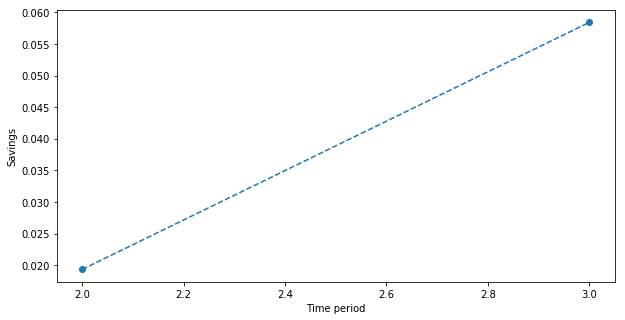

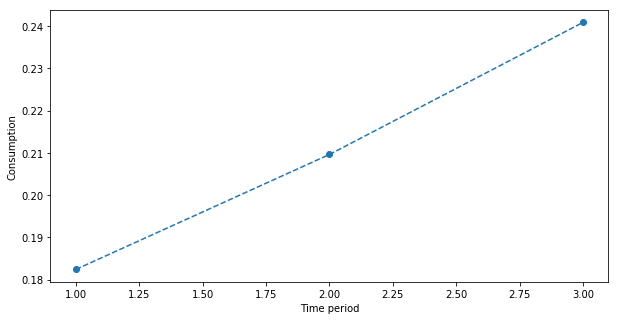

In [5]:
ss_output = get_ss(np.array([.1,.1]), params, functions)
print(ss_output)
get_plots(ss_output)

{'b_ss': array([0.02817696, 0.07686557]), 'c_ss': array([0.19597535, 0.22861559, 0.26669216]), 'w_ss': 0.22415231191003757, 'r_ss': 1.8863599991451423, 'K_ss': 0.1050425255076521, 'Y_ss': 0.7586693633878195, 'C_ss': 0.691283104528901, 'EulErr_ss': [6.934897101018578e-12, 2.5437429940211587e-12], 'RCerr_ss': -5.551115123125783e-17, 'ss_time': 0.0008560000000001899}


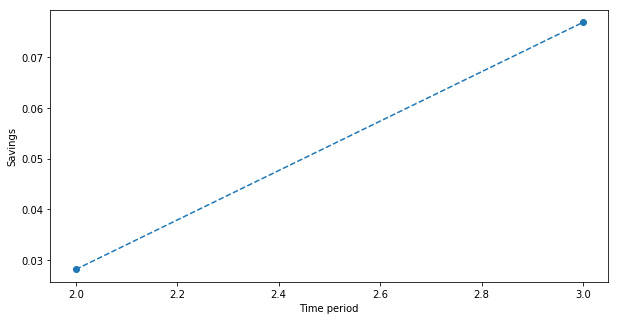

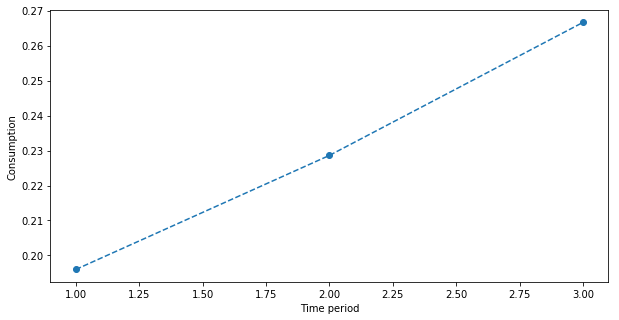

In [6]:
params['beta'] = 0.55
ss_output_new_beta = get_ss(np.array([.1,.1]), params, functions)
print(ss_output_new_beta)
get_plots(ss_output_new_beta)

In [7]:
## TODO: Write intuition